In [105]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os

# Import CDC Pandemic Data File
cdcpandemic_path = os.path.join('USBedsData-PrePandemic','covid19-NatEst.csv')
df = pd.read_csv(cdcpandemic_path)
cdcpandemic_path
df


,state,statename,collectionDate,InpatBeds_Occ_AnyPat_Est,InpatBeds_Occ_AnyPat_LoCI,InpatBeds_Occ_AnyPat_UpCI,InpatBeds_Occ_AnyPat_Est_Avail,InBedsOccAnyPat__Numbeds_Est,InBedsOccAnyPat__Numbeds_LoCI,InBedsOccAnyPat__Numbeds_UpCI,...,InBedsOccCOVID__Numbeds_LoCI,InBedsOccCOVID__Numbeds_UpCI,ICUBeds_Occ_AnyPat_Est,ICUBeds_Occ_AnyPat_LoCI,ICUBeds_Occ_AnyPat_UpCI,ICUBeds_Occ_AnyPat_Est_Avail,ICUBedsOccAnyPat__N_ICUBeds_Est,ICUBedsOccAnyPat__N_ICUBeds_LoCI,ICUBedsOccAnyPat__N_ICUBeds_UpCI,Notes
0,Two-letter state abbreviation,State name,Day for which estimate is made,"Hospital inpatient bed occupancy, estimate","Hospital inpatient bed occupancy, lower 95% CI","Hospital inpatient bed occupancy, upper 95% CI","Hospital inpatient beds available, estimate","Hospital inpatient bed occupancy, percent esti...","Hospital inpatient bed occupancy, lower 95% CI...","Hospital inpatient bed occupancy, upper 95% CI...",...,Number of patients in an inpatient care locati...,Number of patients in an inpatient care locati...,"ICU bed occupancy, estimate","ICU bed occupancy, lower 95% CI","ICU bed occupancy, upper 95% CI","ICU beds available, estimate","ICU bed occupancy, percent estimate (percent o...","ICU bed occupancy, lower 95% CI (percent of IC...","ICU bed occupancy, upper 95% CI (percent of IC...",This file contains National and State represen...
1,US,United States,01APR2020,416064,380186,451942,350555,54.3,52.5,56.0,...,8.6,11.0,66369,56770,75968,45110,59.5,55.8,63.2,These estimates are based on data retrieved on...
2,US,United States,02APR2020,422892,391381,454403,357231,54.2,52.7,55.7,...,8.7,10.9,69385,60557,78214,45784,60.2,57.1,63.4,Statistical methods were used to generate esti...
3,US,United States,03APR2020,408938,382065,435810,364108,52.9,51.2,54.6,...,8.9,11.1,70580,61067,80092,45788,60.7,57.3,64.0,The estimates are based on data submitted by a...
4,US,United States,04APR2020,398850,374147,423554,375854,51.5,50.0,53.0,...,9.2,11.4,70134,62054,78215,47622,59.6,56.6,62.5,The statistical methods include weighting (to ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5028,WY,Wyoming,03JUL2020,434,82,785,489,47.0,34.8,59.1,...,0.4,2.6,57,0,123,6,90.3,50.7,100.0,NaN
5029,WY,Wyoming,04JUL2020,450,86,813,475,48.7,35.7,61.6,...,0.0,3.2,54,0,112,9,85.7,47.9,100.0,NaN
5030,WY,Wyoming,05JUL2020,438,69,808,494,47.0,33.5,60.5,...,0.0,3.1,41,0,86,21,65.7,26.4,100.0,NaN
5031,WY,Wyoming,06JUL2020,408,77,740,514,44.3,31.1,57.4,...,0.2,3.8,42,0,91,21,67.7,29.1,100.0,NaN


In [106]:
df.head()

,state,statename,collectionDate,InpatBeds_Occ_AnyPat_Est,InpatBeds_Occ_AnyPat_LoCI,InpatBeds_Occ_AnyPat_UpCI,InpatBeds_Occ_AnyPat_Est_Avail,InBedsOccAnyPat__Numbeds_Est,InBedsOccAnyPat__Numbeds_LoCI,InBedsOccAnyPat__Numbeds_UpCI,...,InBedsOccCOVID__Numbeds_LoCI,InBedsOccCOVID__Numbeds_UpCI,ICUBeds_Occ_AnyPat_Est,ICUBeds_Occ_AnyPat_LoCI,ICUBeds_Occ_AnyPat_UpCI,ICUBeds_Occ_AnyPat_Est_Avail,ICUBedsOccAnyPat__N_ICUBeds_Est,ICUBedsOccAnyPat__N_ICUBeds_LoCI,ICUBedsOccAnyPat__N_ICUBeds_UpCI,Notes
0,Two-letter state abbreviation,State name,Day for which estimate is made,"Hospital inpatient bed occupancy, estimate","Hospital inpatient bed occupancy, lower 95% CI","Hospital inpatient bed occupancy, upper 95% CI","Hospital inpatient beds available, estimate","Hospital inpatient bed occupancy, percent esti...","Hospital inpatient bed occupancy, lower 95% CI...","Hospital inpatient bed occupancy, upper 95% CI...",...,Number of patients in an inpatient care locati...,Number of patients in an inpatient care locati...,"ICU bed occupancy, estimate","ICU bed occupancy, lower 95% CI","ICU bed occupancy, upper 95% CI","ICU beds available, estimate","ICU bed occupancy, percent estimate (percent o...","ICU bed occupancy, lower 95% CI (percent of IC...","ICU bed occupancy, upper 95% CI (percent of IC...",This file contains National and State represen...
1,US,United States,01APR2020,416064,380186,451942,350555,54.3,52.5,56.0,...,8.6,11.0,66369,56770,75968,45110,59.5,55.8,63.2,These estimates are based on data retrieved on...
2,US,United States,02APR2020,422892,391381,454403,357231,54.2,52.7,55.7,...,8.7,10.9,69385,60557,78214,45784,60.2,57.1,63.4,Statistical methods were used to generate esti...
3,US,United States,03APR2020,408938,382065,435810,364108,52.9,51.2,54.6,...,8.9,11.1,70580,61067,80092,45788,60.7,57.3,64.0,The estimates are based on data submitted by a...
4,US,United States,04APR2020,398850,374147,423554,375854,51.5,50.0,53.0,...,9.2,11.4,70134,62054,78215,47622,59.6,56.6,62.5,The statistical methods include weighting (to ...


In [107]:
df.shape

(5033, 24)

In [108]:
df.drop([0], axis=0,inplace=True)

In [109]:
df.shape

(5032, 24)

In [110]:
#Get rid of unnecessary columns
df.drop(['statename','collectionDate','InpatBeds_Occ_AnyPat_LoCI','InpatBeds_Occ_AnyPat_UpCI','InBedsOccAnyPat__Numbeds_Est','InBedsOccAnyPat__Numbeds_LoCI','InBedsOccAnyPat__Numbeds_UpCI','ICUBeds_Occ_AnyPat_LoCI','ICUBeds_Occ_AnyPat_UpCI','ICUBedsOccAnyPat__N_ICUBeds_Est','ICUBedsOccAnyPat__N_ICUBeds_LoCI','ICUBedsOccAnyPat__N_ICUBeds_UpCI','Notes'],axis=1,inplace=True)

In [111]:
df.head()

,state,InpatBeds_Occ_AnyPat_Est,InpatBeds_Occ_AnyPat_Est_Avail,InpatBeds_Occ_COVID_Est,InpatBeds_Occ_COVID_LoCI,InpatBeds_Occ_COVID_UpCI,InBedsOccCOVID__Numbeds_Est,InBedsOccCOVID__Numbeds_LoCI,InBedsOccCOVID__Numbeds_UpCI,ICUBeds_Occ_AnyPat_Est,ICUBeds_Occ_AnyPat_Est_Avail
1,US,416064,350555,75104,66243,83964,9.8,8.6,11.0,66369,45110
2,US,422892,357231,76546,67898,85195,9.8,8.7,10.9,69385,45784
3,US,408938,364108,77122,68537,85707,10.0,8.9,11.1,70580,45788
4,US,398850,375854,79742,70862,88622,10.3,9.2,11.4,70134,47622
5,US,400937,381724,80287,71361,89213,10.3,9.1,11.4,69853,48620


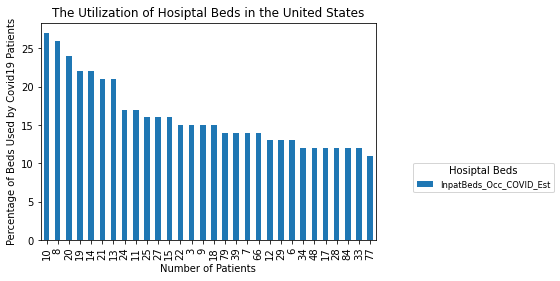

In [147]:
# This graph will look at the number of patients in an inpatient care location who have suspected or confirmed COVID-19, percent estimate (percent of inpatient beds)
df["InpatBeds_Occ_COVID_Est"].value_counts().head(30).plot(kind="bar")
plt.title("The Utilization of Hosiptal Beds in the United States")
plt.xlabel("Number of Patients")
plt.ylabel("Percentage of Beds Used by Covid19 Patients")
plt.legend(loc="lower left", bbox_to_anchor=(1.1, 0.2), fontsize='small', title='Hosiptal Beds')

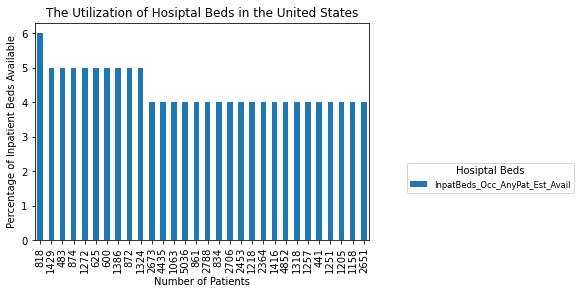

In [144]:
# This graph will look at hospitals inpatient beds availability, a rough estimate
df["InpatBeds_Occ_AnyPat_Est_Avail"].value_counts().head(30).plot(kind="bar")
plt.title("The Utilization of Hosiptal Beds in the United States")
plt.xlabel("Number of Patients")
plt.ylabel("Percentage of Inpatient Beds Available")
plt.legend(loc="lower left", bbox_to_anchor=(1.1, 0.2), fontsize='small', title='Hosiptal Beds')

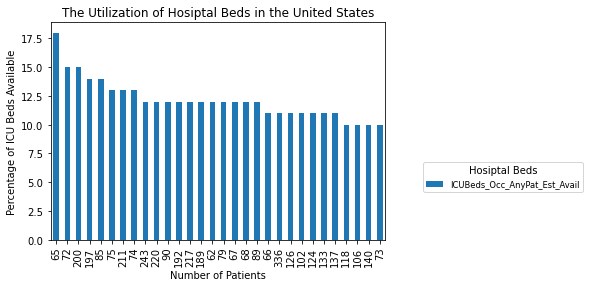

In [143]:
# This graph will look at hospitals ICU beds availability, a rough estimate
df["ICUBeds_Occ_AnyPat_Est_Avail"].value_counts().head(30).plot(kind="bar")
plt.title("The Utilization of Hosiptal Beds in the United States")
plt.xlabel("Number of Patients")
plt.ylabel("Percentage of ICU Beds Available")
plt.legend(loc="lower left", bbox_to_anchor=(1.1, 0.2), fontsize='small', title='Hosiptal Beds')